In [1]:
install.packages("GGally")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
drugs_data <- read_csv("data_sets_project/drug_consumption.csv", col_names = FALSE)
colnames(drugs_data) <- c("ID",
                          "Age", 
                          "Gender", 
                          "Education", 
                          "Country", 
                          "Ethnicity", 
                          "Neuroticism", 
                          "Extraversion", 
                          "Openness_to_Experience", 
                          "Agreeableness", 
                          "Conscientiousness",
                          "Impulsiveness", 
                          "Sensation_Seeing",
                          "Alcohol",
                          "Amphet", 
                          "Amyl", 
                          "Benzos",
                          "Caff",
                          "Cannabis", 
                          "Choc", 
                          "Coke",
                          "Crack", 
                          "Ecstacy", 
                          "Heorin", 
                          "LegalH", 
                          "LSD", 
                          "Meth",
                          "Mushrooms", 
                          "Nicotine", 
                          "Semer",
                          "VSA")
drugs_data
alcohol_data <- select(drugs_data, Age, Neuroticism, Extraversion, Openness_to_Experience, Agreeableness, Impulsiveness, Alcohol)
alcohol_data

Rows: 1885 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X...
dbl (13): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,⋯,Ecstacy,Heorin,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,NA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.49788,0.31287,-0.57545,-0.58331,-0.91699,-0.21712,CL5
-0.07854,-0.67825,1.93886,1.43533,0.76096,-0.71126,CL5
0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,CL6
⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.07854,1.13281,-1.37639,-1.27553,-1.77200,0.52975,CL4
-0.95197,0.91093,-1.92173,0.29338,-1.62090,1.29221,CL5
-0.95197,-0.46725,2.12700,1.65653,1.11406,0.88113,CL4


In [4]:
alcohol_data_count <- alcohol_data |>
                      group_by(Alcohol) |>
                      summarize(n = n())
alcohol_data_count

Alcohol,n
<chr>,<int>
CL0,34
CL1,34
CL2,68
⋮,⋮
CL4,287
CL5,759
CL6,505


In [5]:
alcohol_split <- initial_split(alcohol_data, prop = 0.75, strata = Alcohol)
alcohol_train <- training(alcohol_split)
alcohol_test <- testing(alcohol_split)
alcohol_train
alcohol_test

Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.49788,-1.19430,-0.80615,0.14143,-0.60633,-1.37983,CL3
2.59171,-0.24649,-0.80615,-2.63199,-0.30172,0.52975,CL3
1.82213,0.04257,-0.69509,-1.11902,-0.45321,-1.37983,CL3
⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.95197,1.02119,-0.43999,1.43533,-1.07533,-0.71126,CL6
-0.07854,-0.14882,-0.57545,1.43533,-0.91699,0.52975,CL6
-0.95197,1.49158,-1.92173,-0.58331,-1.77200,-0.21712,CL6


Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-0.07854,-0.67825,1.93886,1.43533,0.76096,-0.71126,CL5
-0.95197,-0.14882,-0.80615,-0.01928,0.59042,-1.37983,CL4
2.59171,-0.67825,-0.30033,-1.55521,2.03972,-1.37983,CL2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,CL5
-0.95197,0.73545,-1.23177,0.58331,-0.60633,0.52975,CL5
-0.07854,1.13281,-1.37639,-1.27553,-1.77200,0.52975,CL4


Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-0.95197,1.13281,-0.57545,-1.97495,-0.30172,1.86203,CL3
-0.95197,-0.67825,1.45421,-2.09015,-0.01729,0.52975,CL3
-0.95197,0.31287,0.63779,1.06238,1.11406,-0.71126,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.95197,1.13281,-0.43999,0.29338,-0.76096,1.86203,CL6
-0.95197,1.02119,-0.43999,1.43533,-1.07533,-0.71126,CL6
-0.95197,1.49158,-1.92173,-0.58331,-1.77200,-0.21712,CL6


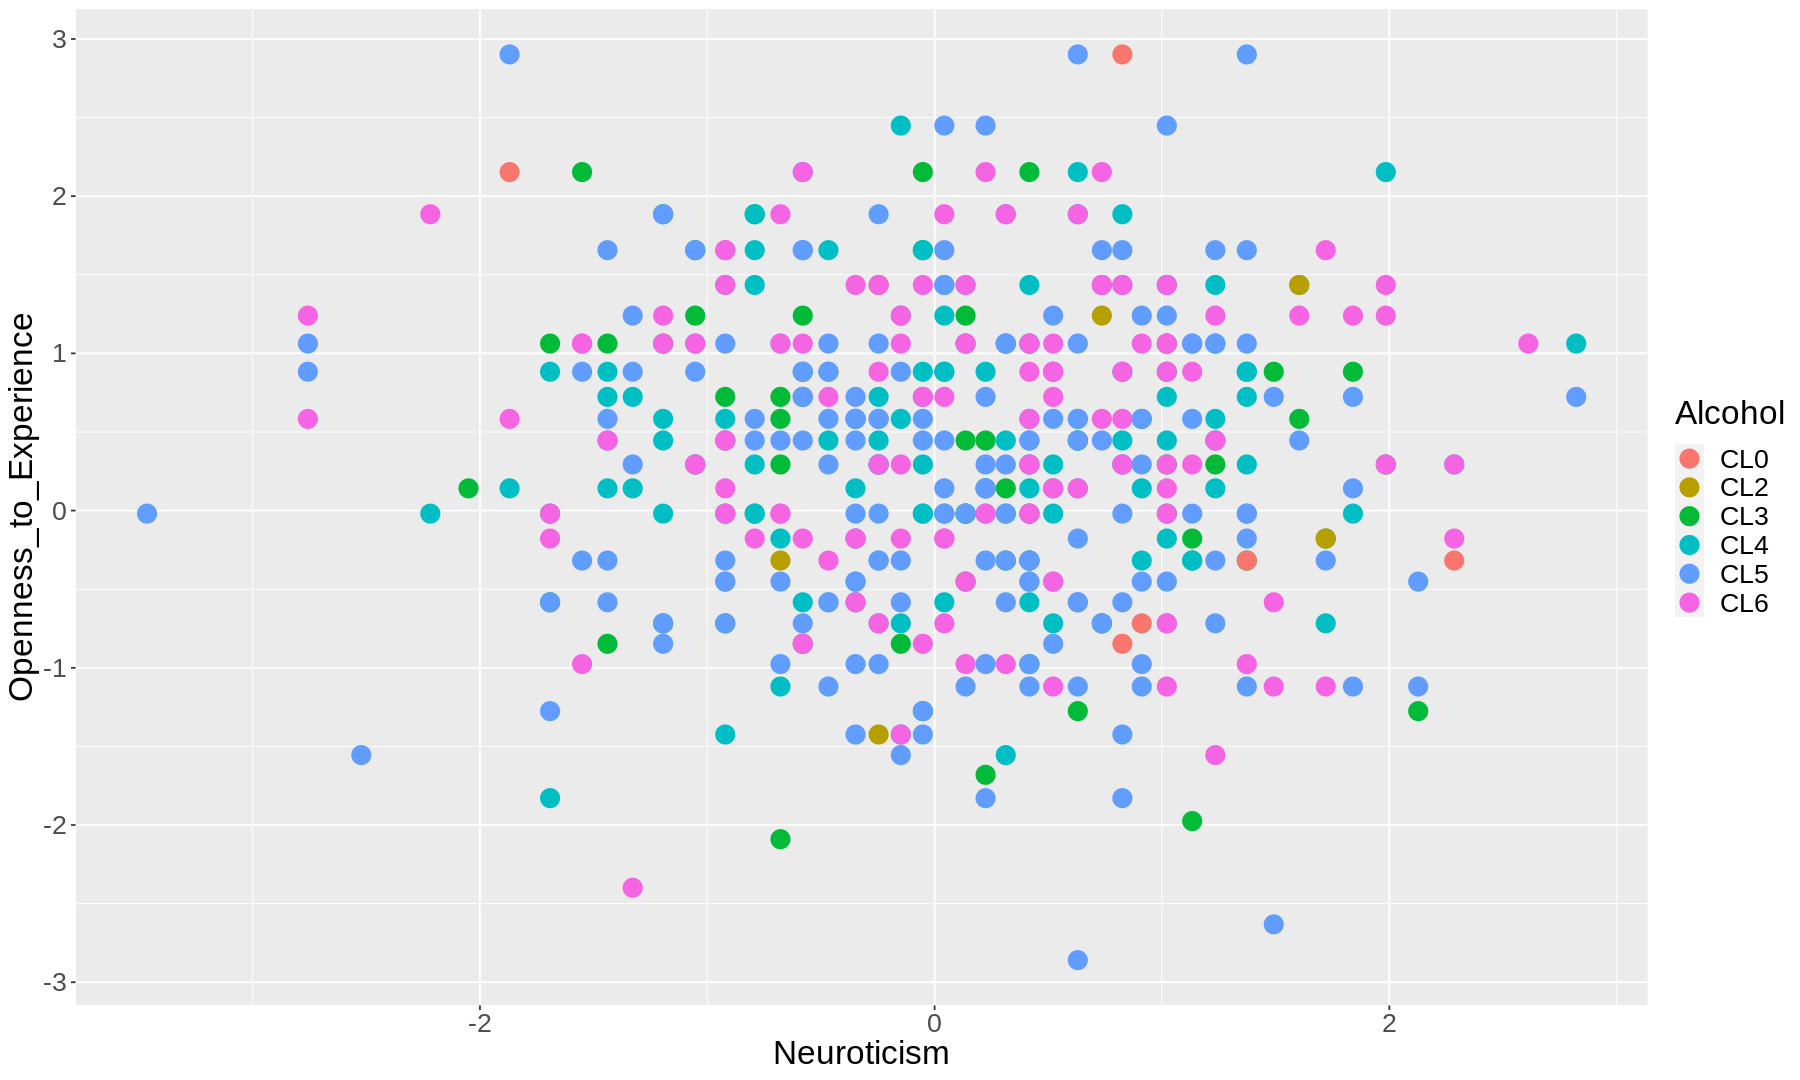

In [6]:
options(repr.plot.width = 15, repr.plot.height = 9)

alcohol_data_filtered <- filter(alcohol_train, Age == -0.95197)
alcohol_data_filtered

alcohol_plot <- ggplot(alcohol_data_filtered, aes(x = Neuroticism, y = Openness_to_Experience, colour = Alcohol)) +
                geom_point(size = 5) +
                theme(text = element_text(size = 20)) 
alcohol_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



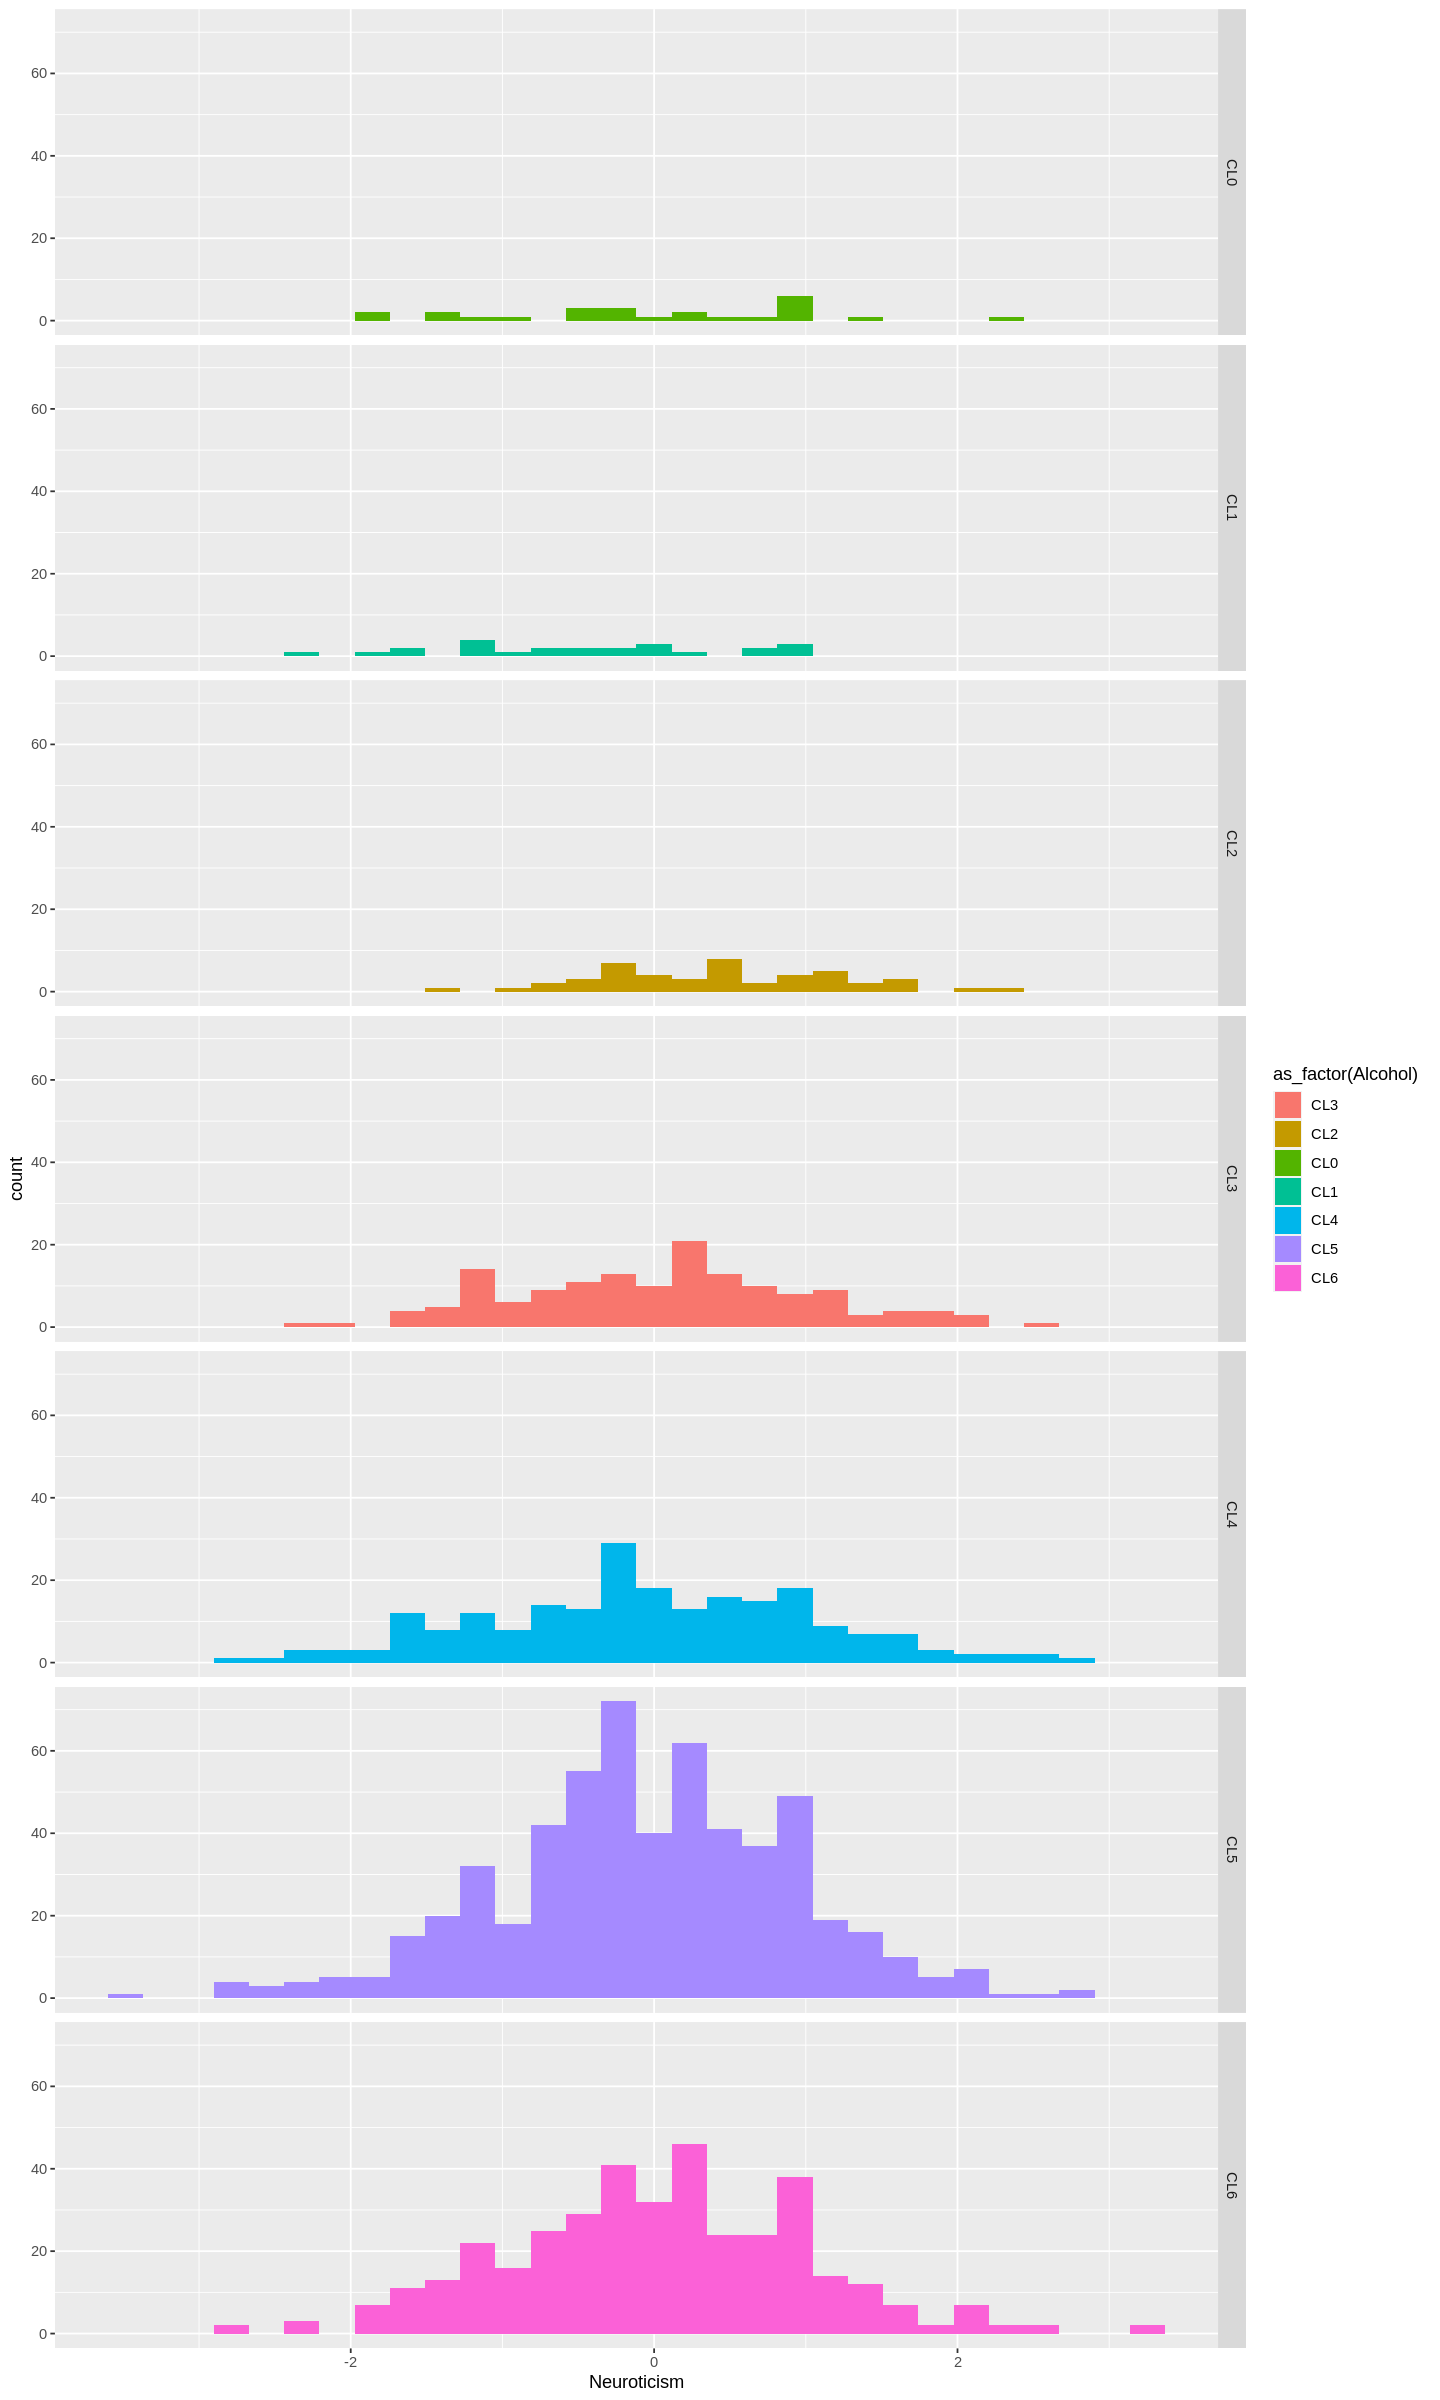

In [7]:
options(repr.plot.width = 12, repr.plot.height = 20)
alcohol_plot_nscore <- ggplot(alcohol_train, aes(x = Neuroticism, fill = as_factor(Alcohol))) +
  geom_histogram() +
 facet_grid(rows = vars(Alcohol))
alcohol_plot_nscore

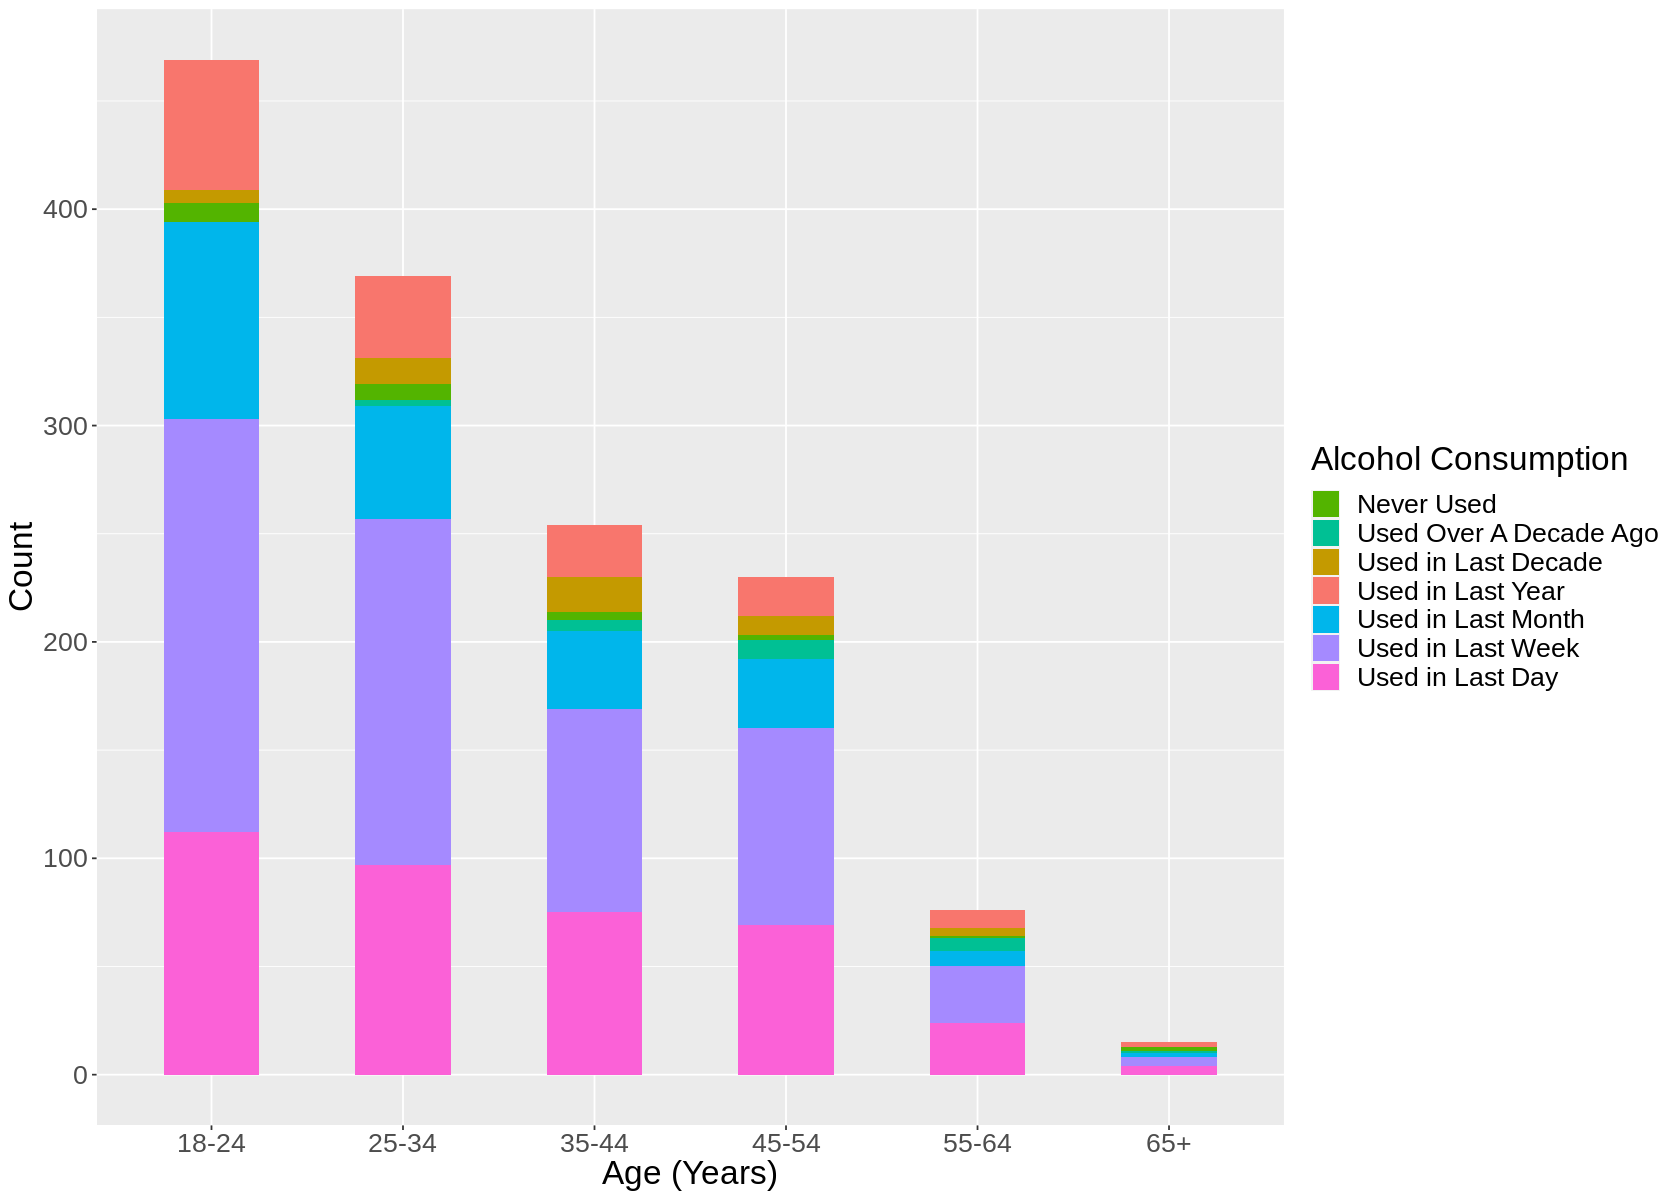

In [8]:
options(repr.plot.width = 14, repr.plot.height = 10)
alcohol_plot_age <- ggplot(alcohol_train, aes(x = as_factor(Age), fill = as_factor(Alcohol))) +
  geom_bar(width = 0.5) +
theme(text = element_text(size = 20)) + 
        scale_x_discrete(breaks = c("2.59171", "1.82213", "1.09449", "0.49788", "-0.07854", "-0.95197"),
                   labels = c("65+", "55-64", "45-54", "35-44", "25-34", "18-24")) +
scale_fill_discrete(breaks = c("CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"),
                   labels = c("Never Used", "Used Over A Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day")) +
                labs(x = "Age (Years)", y = "Count", fill = "Alcohol Consumption")
alcohol_plot_age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



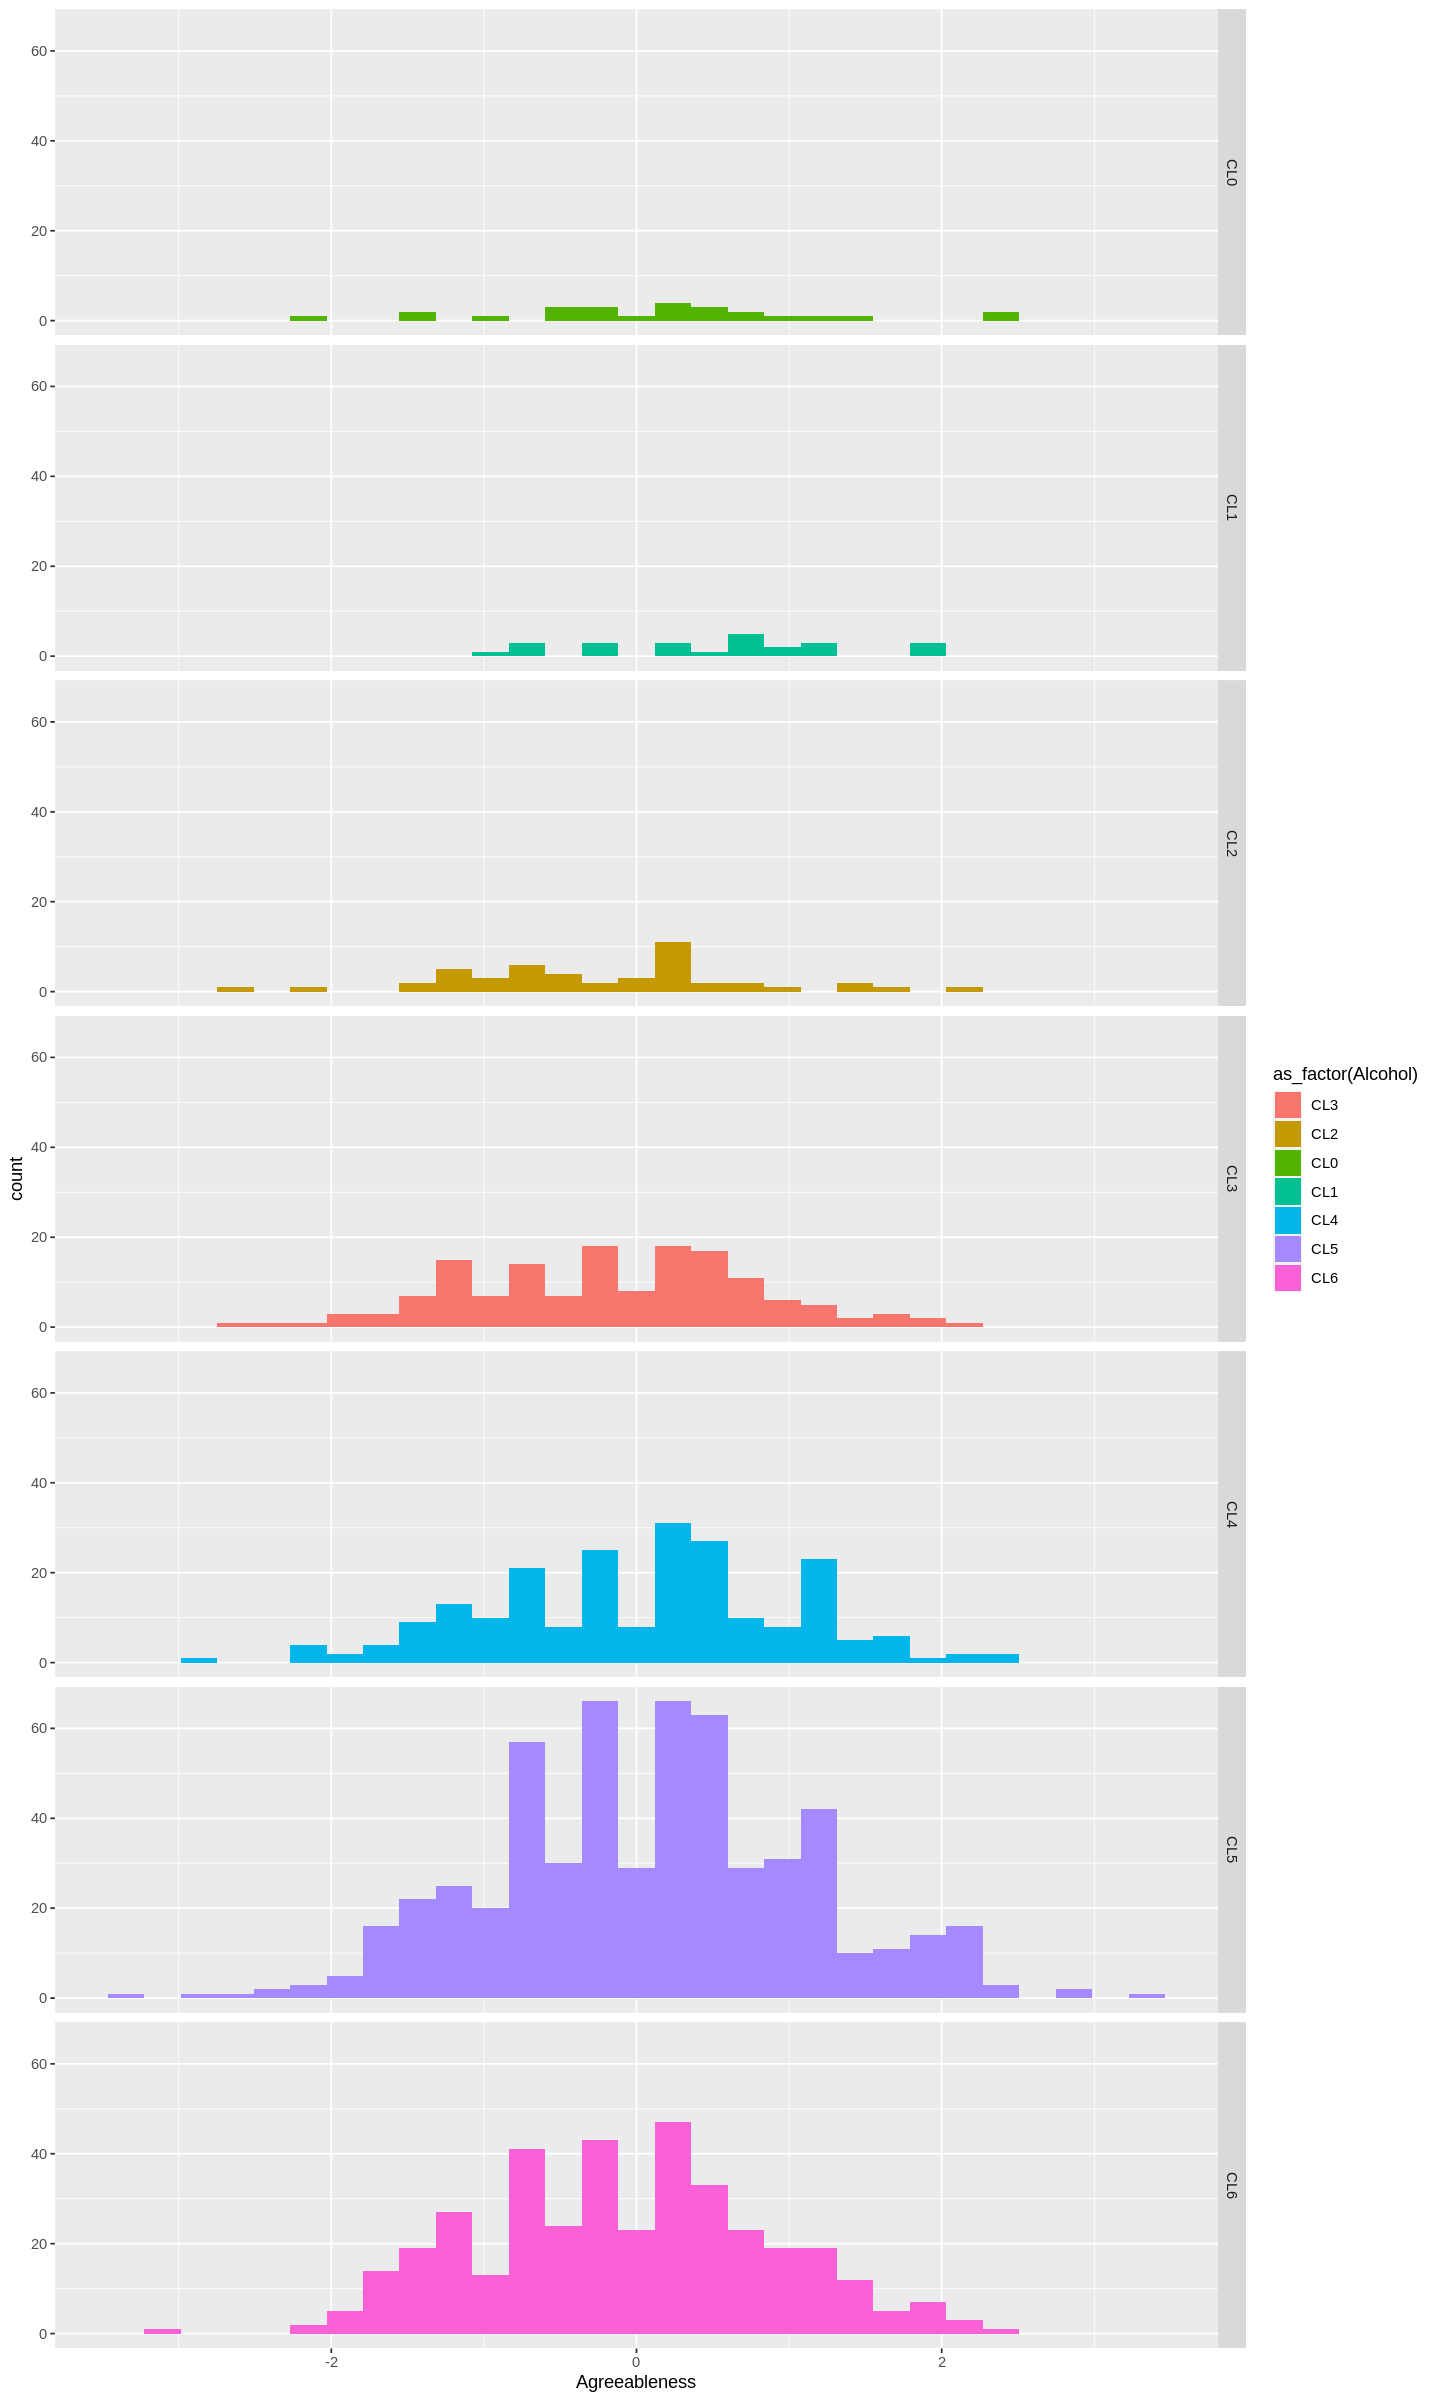

In [9]:
options(repr.plot.width = 12, repr.plot.height = 20)
alcohol_plot_ascore <- ggplot(alcohol_train, aes(x = Agreeableness, fill = as_factor(Alcohol))) +
  geom_histogram() +
    facet_grid(rows = vars(Alcohol))
alcohol_plot_ascore

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



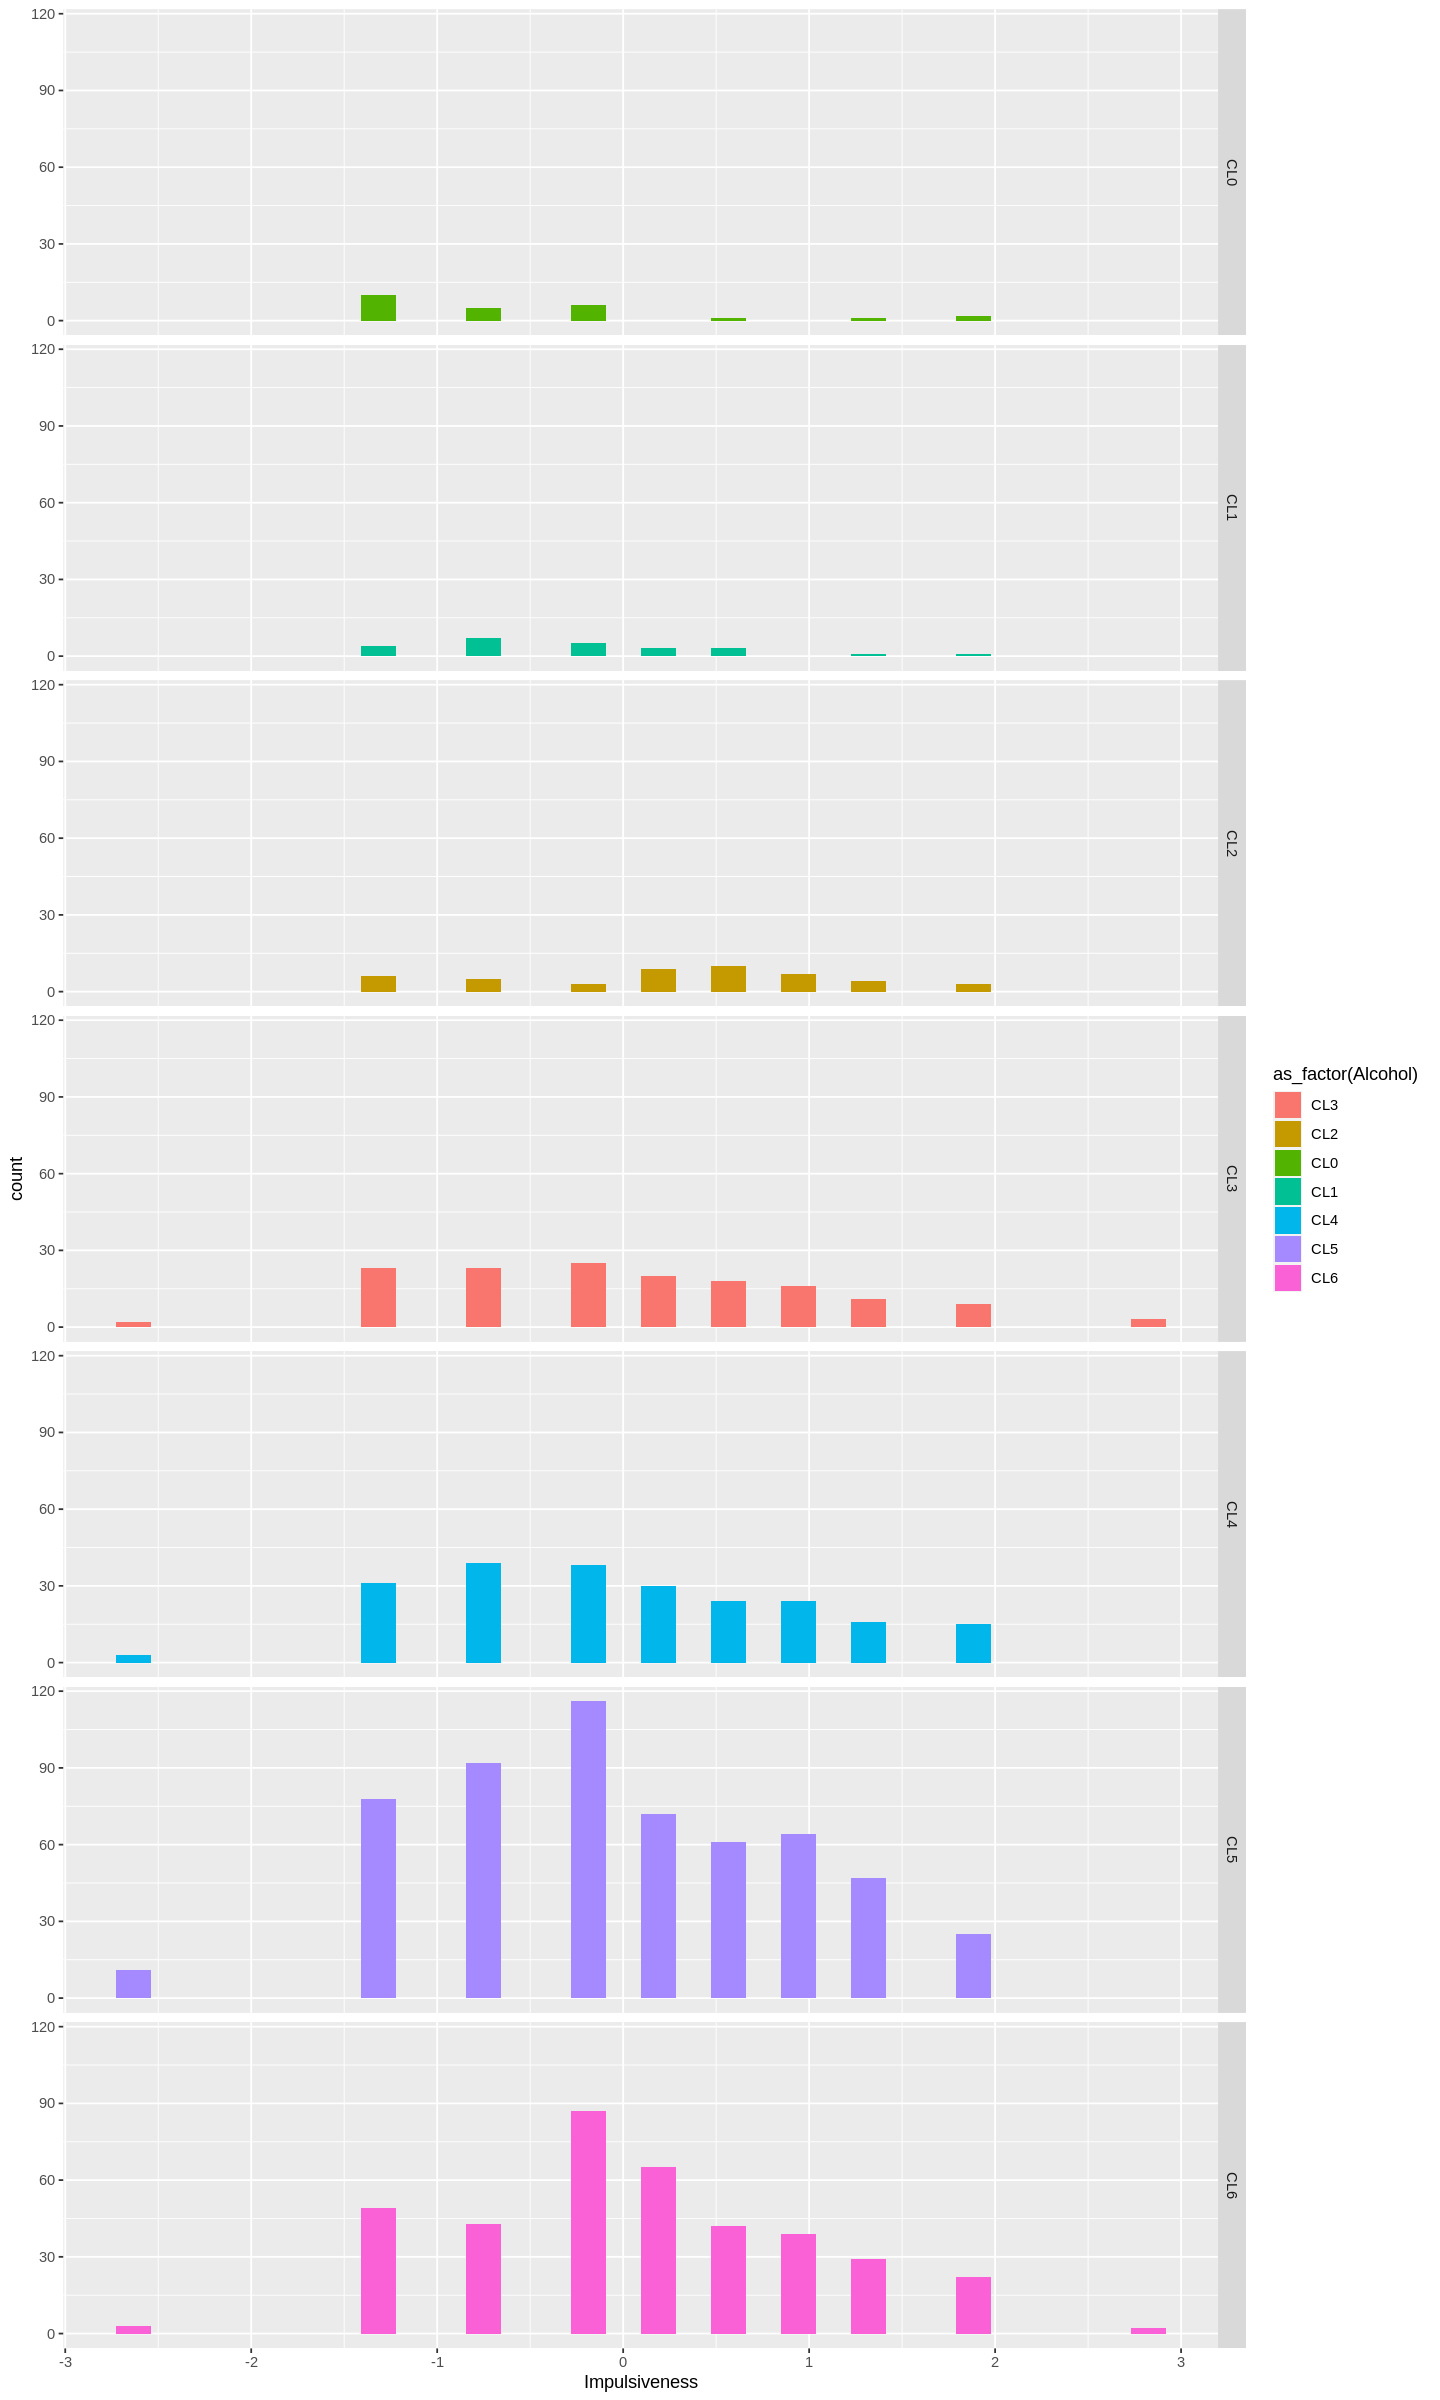

In [10]:
options(repr.plot.width = 12, repr.plot.height = 20)
alcohol_plot_iscore <- ggplot(alcohol_train, aes(x = Impulsiveness, fill = as_factor(Alcohol))) +
  geom_histogram() +
 facet_grid(rows = vars(Alcohol))
alcohol_plot_iscore

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



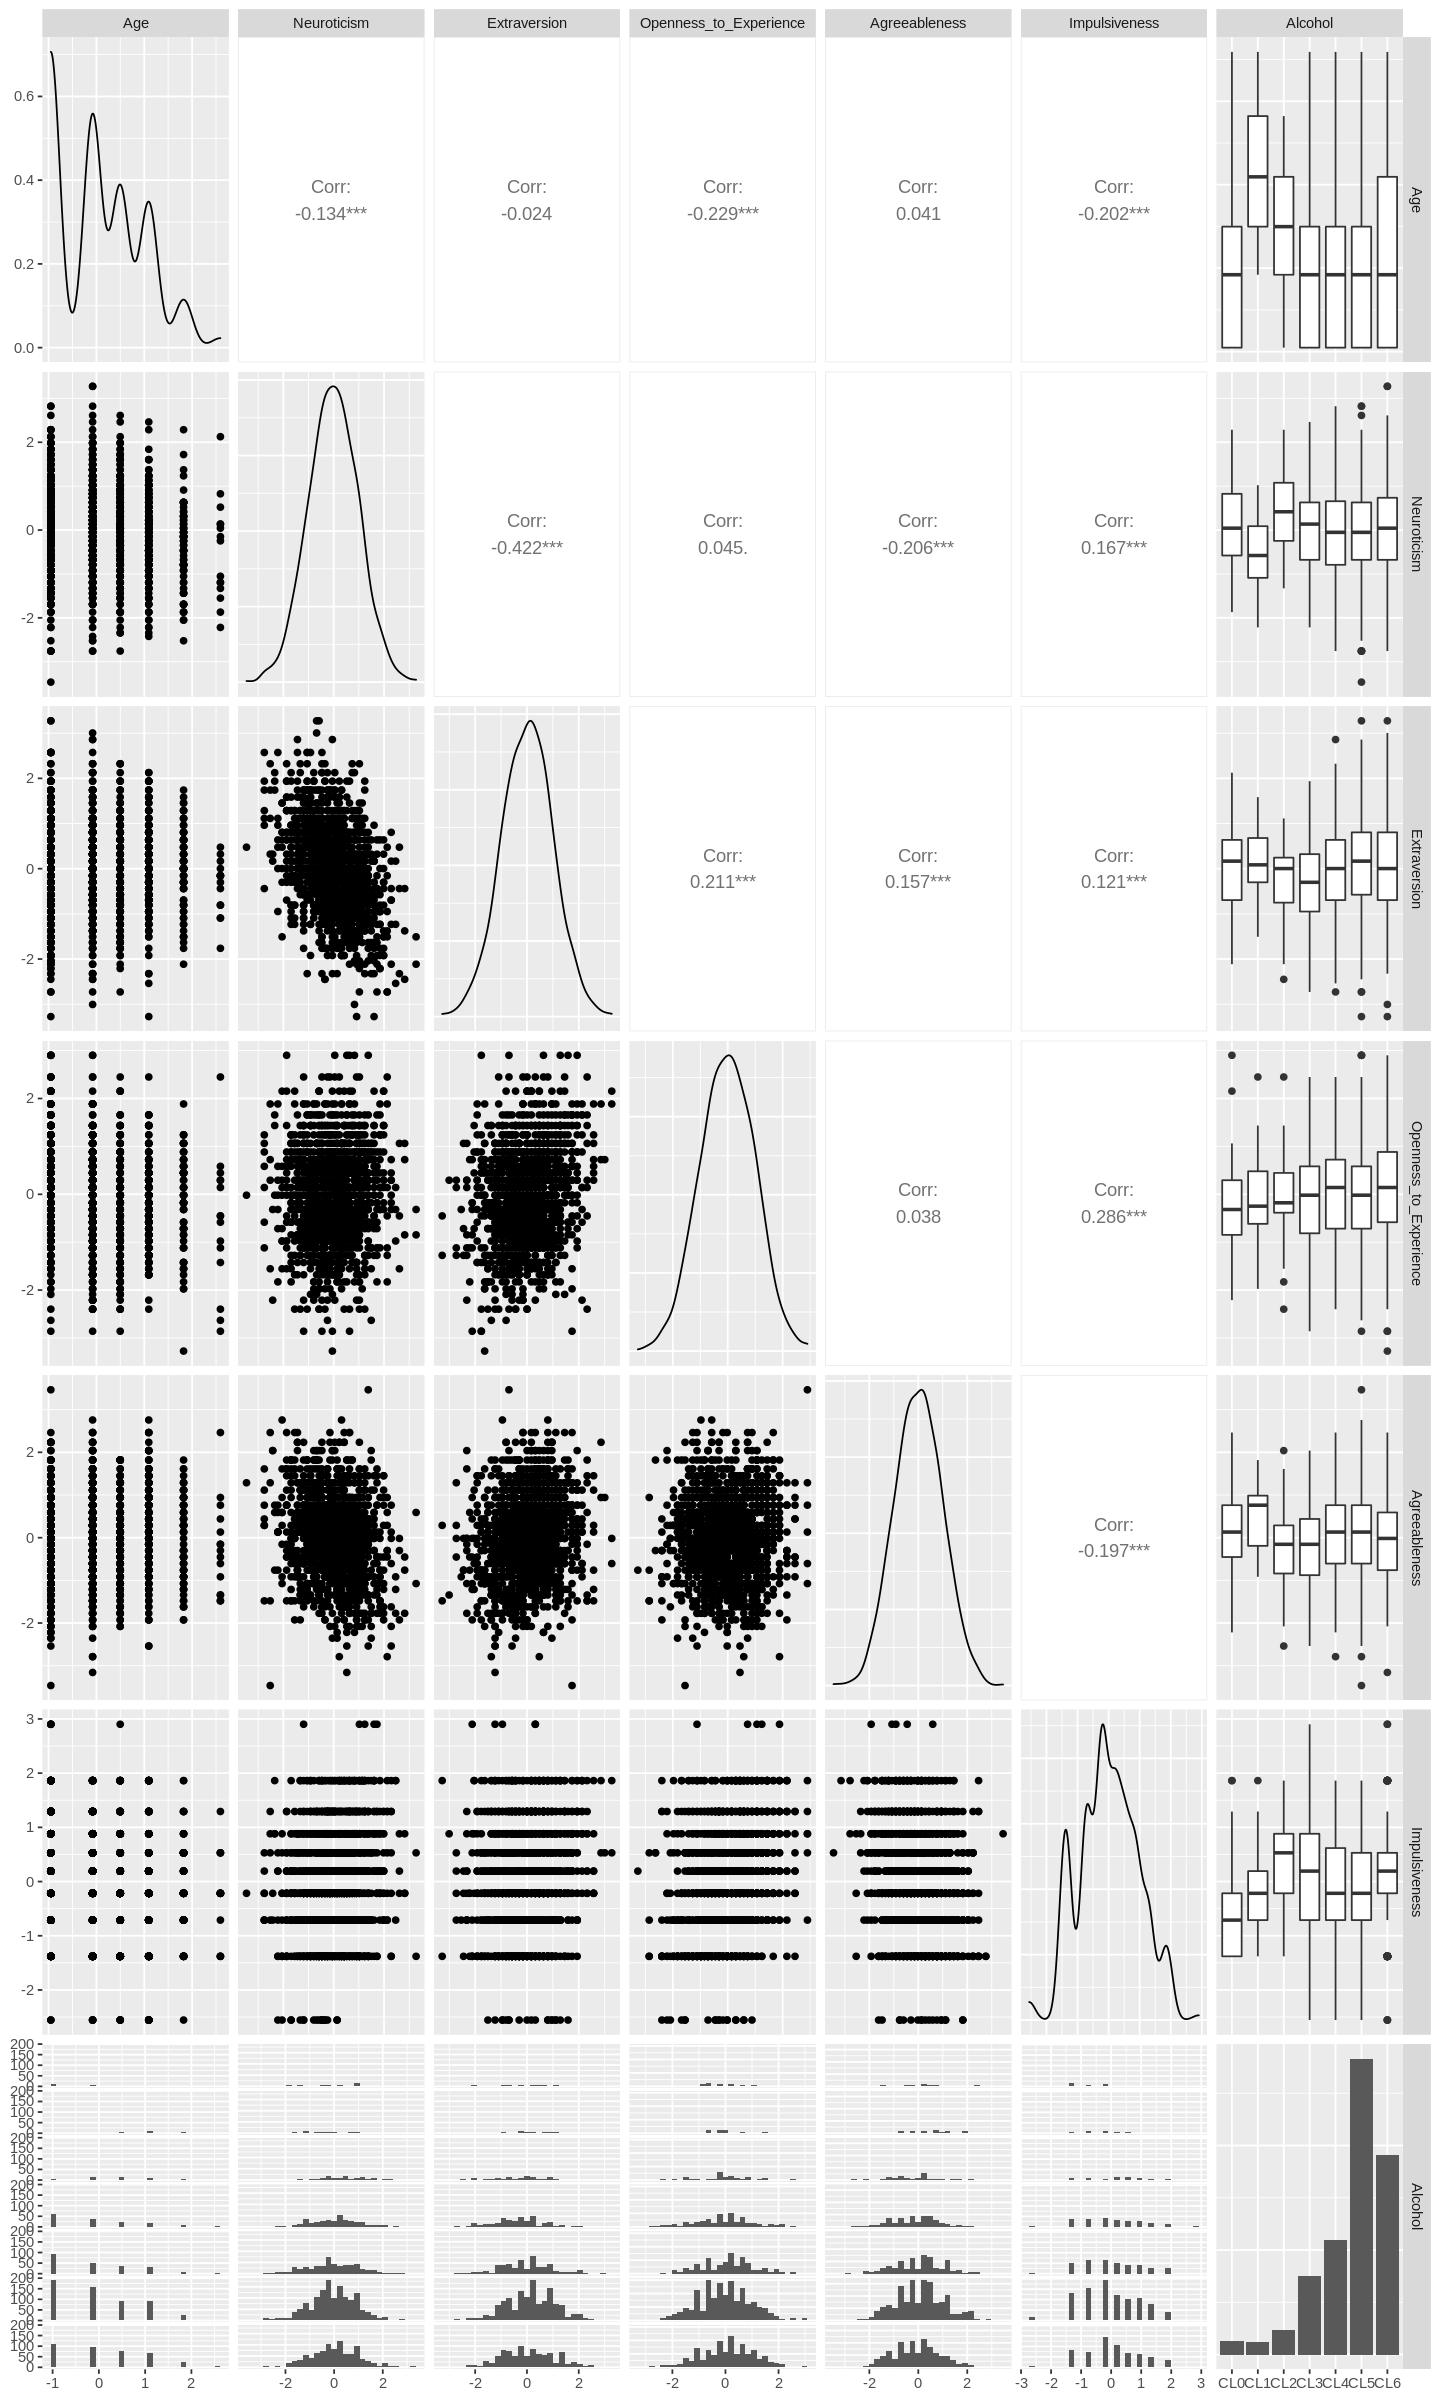

In [14]:
ggpairs(alcohol_train)

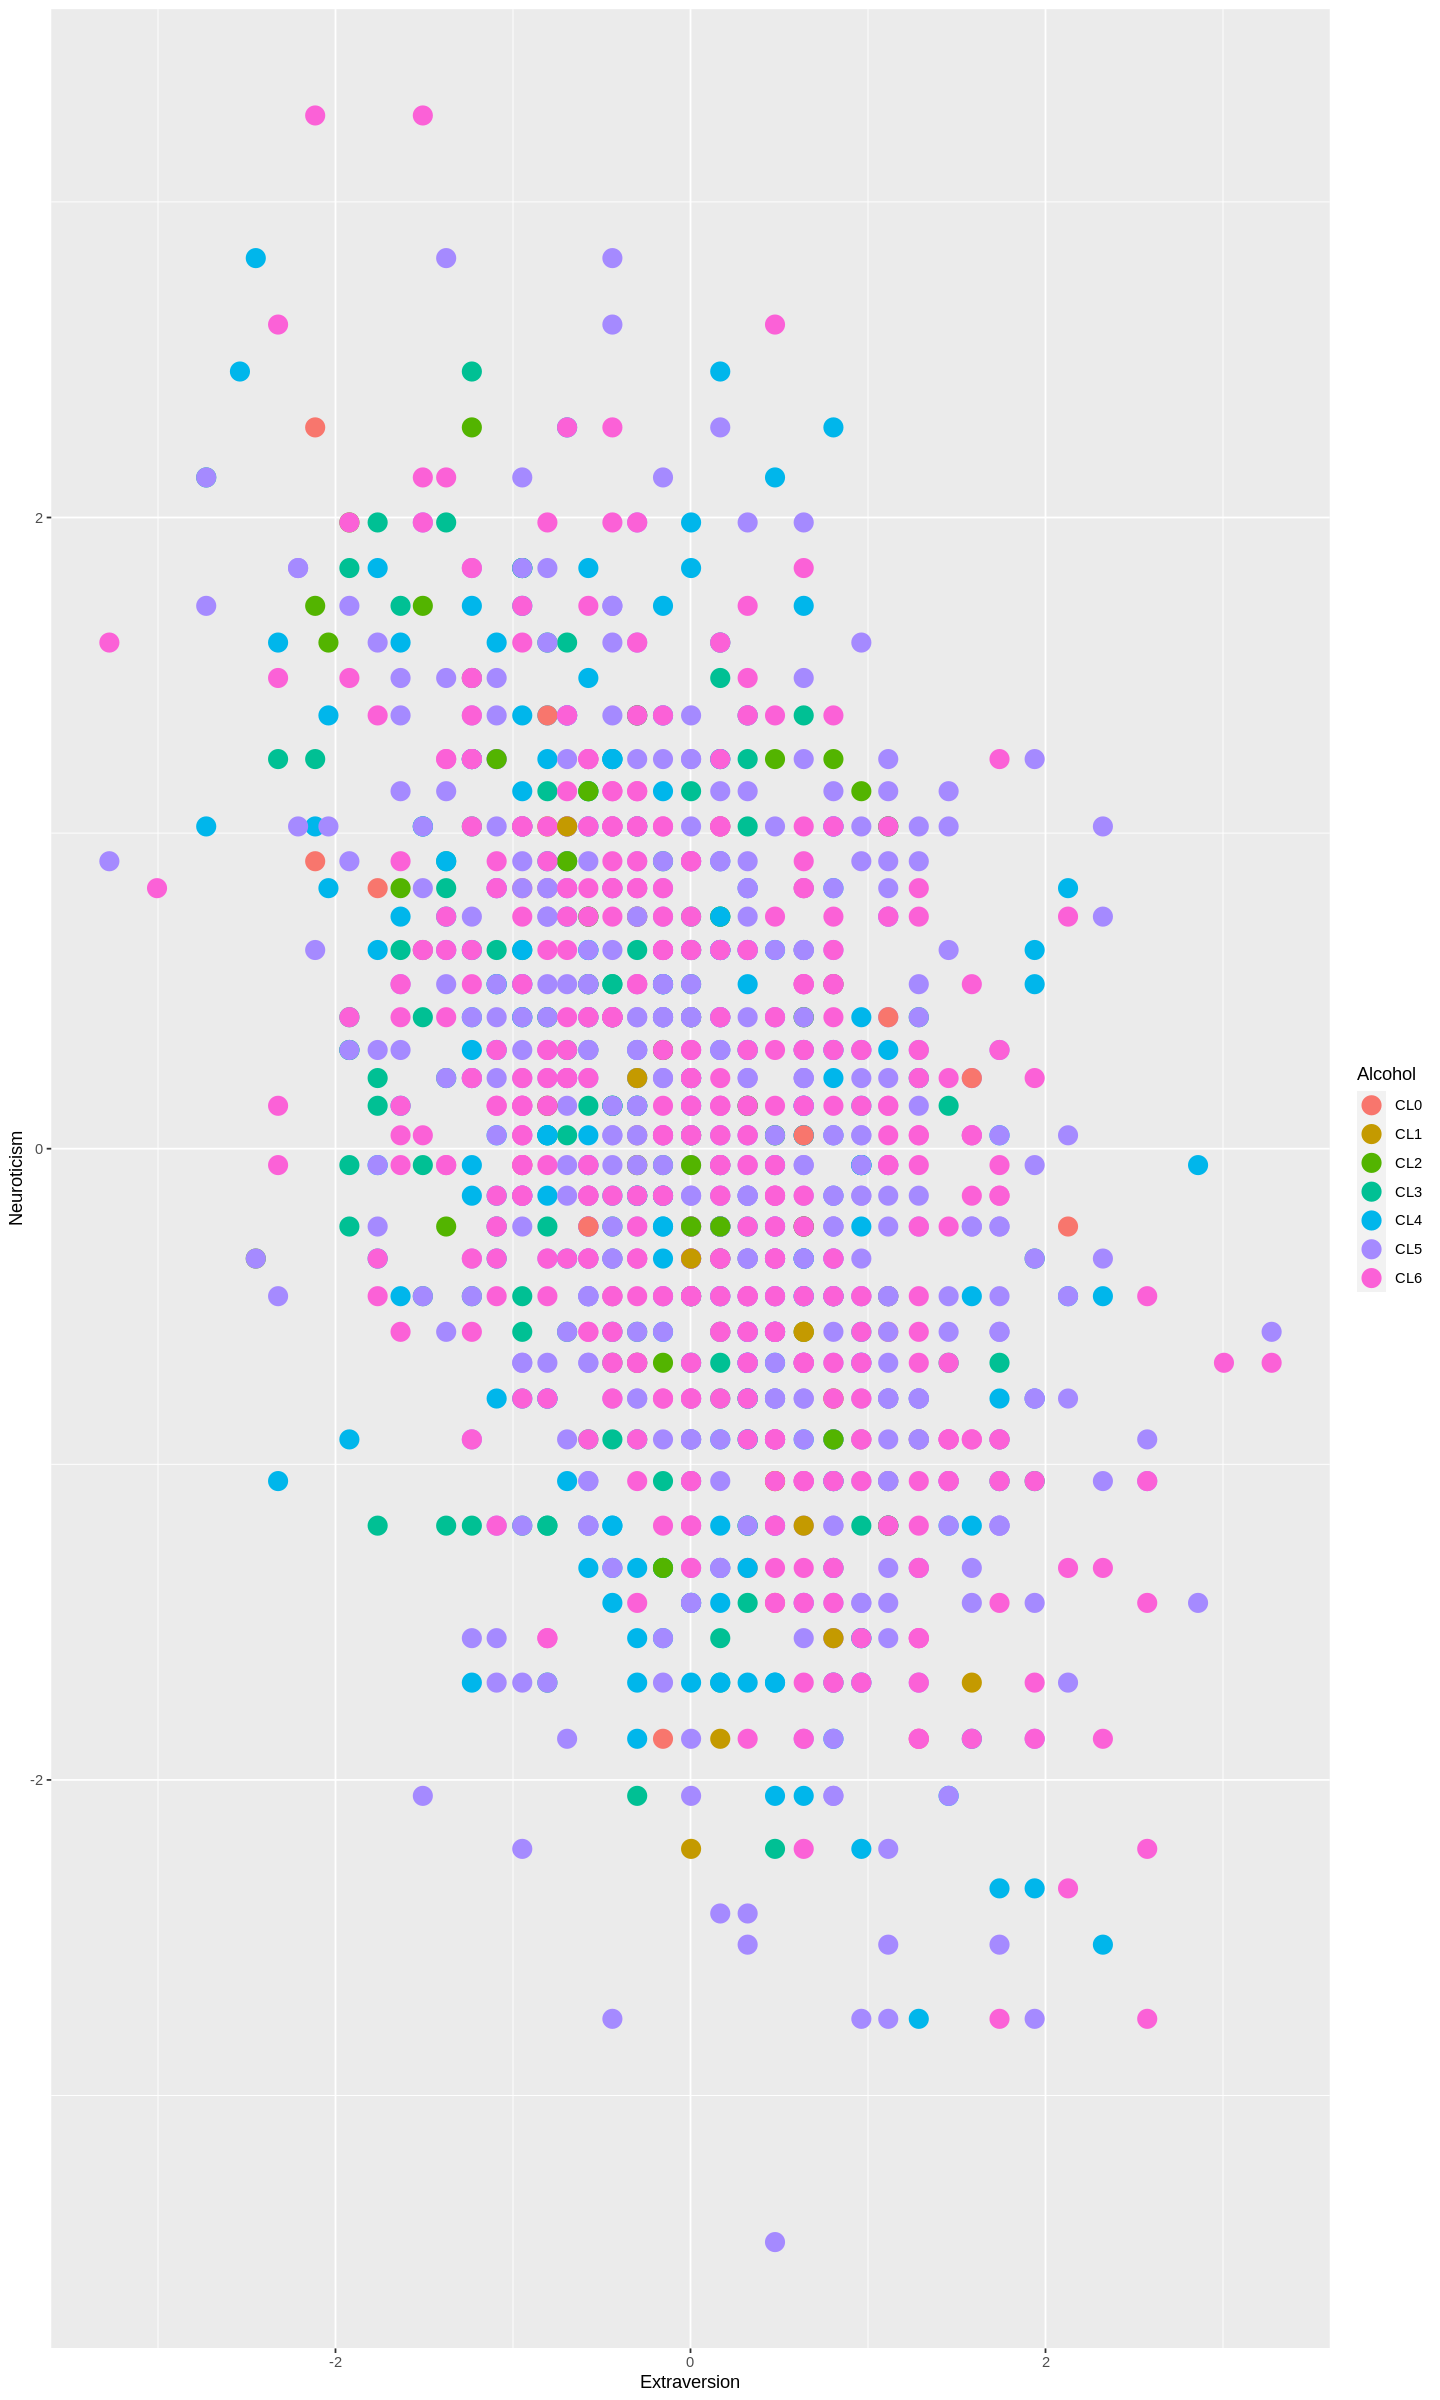

In [12]:
escore_v_nscore <- ggplot(alcohol_train, aes(x=Extraversion, y=Neuroticism, colour=Alcohol)) +
                    geom_point(size=5)
escore_v_nscore

In [ ]:
analysis_plot <- ggplot(alcohol_train, aes(x = Alcohol, y = 